<a href="https://colab.research.google.com/github/luckeydoo6/Dark-Matter/blob/main/class_demo_orbital_velocity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import astropy.units as u
import astropy.constants as ac
import matplotlib.pyplot as plt
# This gives us all the required software to compute the following problems in the lines of code such as,
# computing complex equations, computing astrophysics, astrophysics's constants, and a plotting software

In [21]:
from google.colab import files
# allows us to begin importing files

In [22]:
upload = files.upload()
# This uploads a file from the computer

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006 (1).txt


In [23]:
import astropy.io.ascii
# This allows the code to read the data from the text

In [24]:
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")
# This pulls up the data text onto the code

(0.0, 300.0)

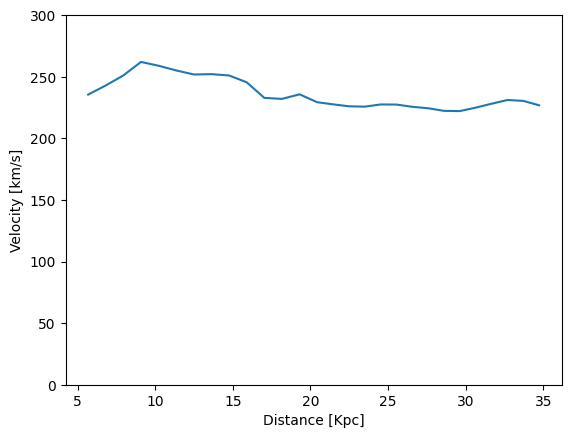

In [25]:
dis = tab["col2"]
vel = tab["col3"]
plt.plot(dis, vel)
plt.xlabel("Distance [Kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)
# This plots the data table within parameters that we set to get a specific look at the data

In [26]:
print(dis)
# This only shows us the distance data from the text

 col2
-----
 5.68
 6.81
 7.95
 9.08
10.22
11.35
12.49
13.62
14.76
15.89
  ...
24.52
25.54
26.56
27.58
 28.6
29.62
30.65
31.67
32.69
33.71
34.73
Length = 28 rows


In [27]:
def calculate_orbital_velocity(mass, radius):
  return(np.sqrt(ac.G * mass / radius))
  # We are defining what we want to calculate from the data table
  # We are then returning the function back for later use

In [28]:
mass = 1 * u.earthMass
radius = 1 * u.earthRad
orb_vel = calculate_orbital_velocity(mass, radius)
print(orb_vel.to(u.km / u.s))
# We are inputing what our mass and radius is, and then calculating the orbital velocity using the ease of the return from the previous line
# Then we print it off so we can see the result

7.905388234385281 km / s


In [41]:
mass = 3e7 * u.solMass
radius = 5.68 * 1000 * u.parsec
orb_vel = calculate_orbital_velocity(mass, radius)
print(orb_vel.to(u.km / u.s))
# Same here as last line of code except we are changing the mass and radius, and then looking at the results

4.766142291386287 km / s


In [42]:
vel_bh = np.zeros(np.shape(dis)) * u.km / u.s
 # create a velocity array with the same number of elements as  the distance array

for i, radius in enumerate(dis):
  rad = radius * 1000 * u.parsec
  orb_vel = calculate_orbital_velocity(mass, rad)
  vel_bh[i]= orb_vel
 # print("The orbital velocity at ", radius, "kpc = ", orb_vel.to(u.km / u.s))
 # We are making the program calculate the result of every possible equation the data sheet gives us with our specific parameters

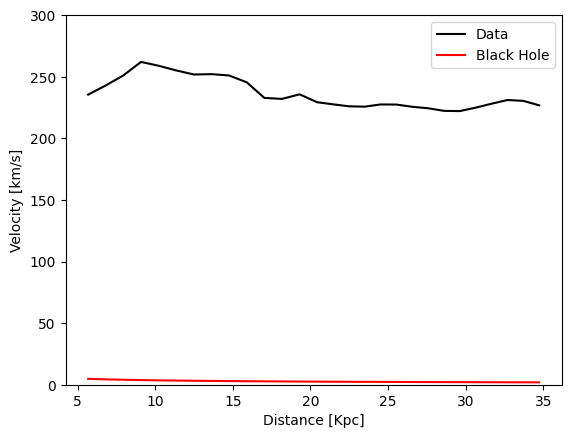

In [43]:
dis = tab["col2"]
vel = tab["col3"]
plt.plot(dis, vel, color="black", label="Data")
plt.plot(dis, vel_bh.value, color="red", label="Black Hole")
plt.xlabel("Distance [Kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)
plt.legend()
# This sets up the graph so that we can read it and understand what it is showing us by giving it colors and names

In [44]:
vel
# This gives us all the velocities that were calculated from the previous lines of code

235.5
242.9
251.1
262.0
258.9
255.1
251.8
252.1
251.0
245.5
232.8


In [51]:
vel_bulge = np.zeros(np.shape(dis)) * u.km / u.s
mass = 3.2e10 * u.solMass
for i, radius in enumerate(dis):
  radius = radius * 1000 * u.parsec
  orb_vel = calculate_orbital_velocity(mass, radius)
  vel_bulge[i]= orb_vel
  print(orb_vel.to(u.km / u.s))
# Same here as last line of code except we are changing the mass and radius, and then looking at the results

155.66155540527762 km / s
142.1614935757116 km / s
131.57457298714598 km / s
123.11546487650452 km / s
116.04597604349146 km / s
110.11781941814075 km / s
104.97220366423952 km / s
100.52335613099349 km / s
96.56335685060623 km / s
93.06654360266812 km / s
89.89762319748351 km / s
87.05578008311056 km / s
84.44557147057978 km / s
82.07697658433635 km / s
80.10172804888644 km / s
78.26255055779454 km / s
76.52821830864882 km / s
74.91957423555112 km / s
73.40828653867014 km / s
71.9849153377865 km / s
70.64125441466746 km / s
69.37013137736818 km / s
68.16524601574918 km / s
67.01010433441365 km / s
65.92217106455351 km / s
64.88556240066197 km / s
63.896365737570136 km / s
62.95107370351217 km / s


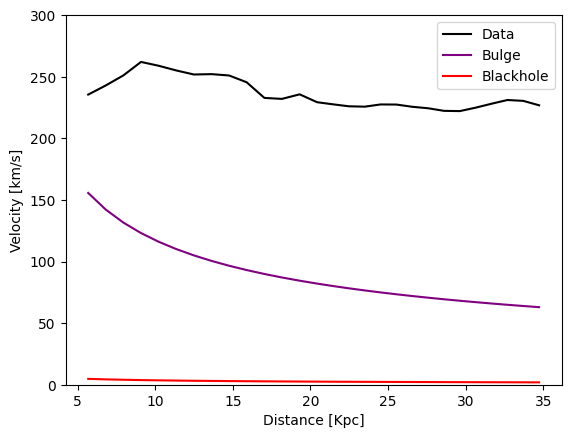

In [52]:
dis = tab["col2"]
vel = tab["col3"]
plt.plot(dis, vel, color="black", label="Data")
plt.plot(dis, vel_bulge.value, color="purple", label="Bulge")
plt.plot(dis, vel_bh.value, color="red", label="Blackhole")
plt.xlabel("Distance [Kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)
plt.legend()
# This sets up the graph so that we can read it and understand what it is showing us by giving it colors and names

In [58]:
vel_disc = np.zeros(np.shape(dis)) * (u.km / u.s)
p_disc = 7.2e10 * u.solMass / (np.pi * (30 * 1000 * u.parsec)**2)

for i, radius in enumerate(dis):
  rad = radius * 1000 * u.parsec
  mass = p_disc * np.pi * rad**2
  orb_vel = calculate_orbital_velocity(mass, rad)
  vel_disc[i]= orb_vel

  print(rad, mass.to(u.solMass), orb_vel.to(u.parsec / u.s)) # change to u.km / u.s to find velocity

5680.0 pc 2580992000.0 solMass 1.4326798755731417e-12 pc / s
6810.0 pc 3710088000.0 solMass 1.5687312521852739e-12 pc / s
7950.0 pc 5056200000.0 solMass 1.6949565008380592e-12 pc / s
9080.0 pc 6595712000.0 solMass 1.8114148214706932e-12 pc / s
10220.0 pc 8355872000.0 solMass 1.9217657124618816e-12 pc / s
11350.0 pc 10305800000.0 solMass 2.0252233381295576e-12 pc / s
12490.0 pc 12480008000.0 solMass 2.1244974387970085e-12 pc / s
13620.0 pc 14840352000.0 solMass 2.2185210125589426e-12 pc / s
14760.0 pc 17428608000.0 solMass 2.309501089264947e-12 pc / s
15890.0 pc 20199368000.0 solMass 2.396276569393959e-12 pc / s
17030.0 pc 23201672000.0 solMass 2.480746096475192e-12 pc / s
18160.0 pc 26382848000.0 solMass 2.561727407607493e-12 pc / s
19300.0 pc 29799200000.0 solMass 2.6409102803839866e-12 pc / s
20430.0 pc 33390792000.0 solMass 2.7171222322060398e-12 pc / s
21450.0 pc 36808200000.0 solMass 2.7841244285447736e-12 pc / s
22470.0 pc 40392072000.0 solMass 2.849551621306621e-12 pc / s
23500.

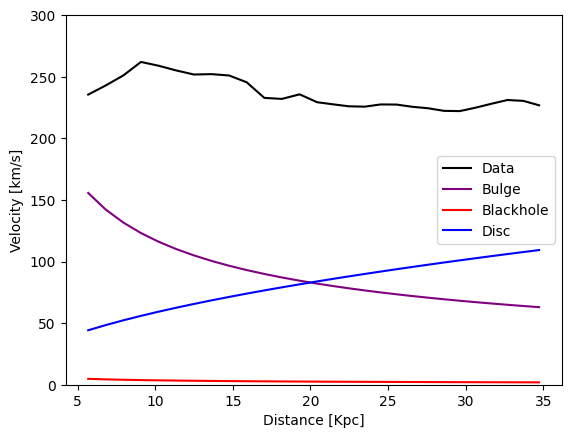

In [59]:
dis = tab["col2"]
vel = tab["col3"]
plt.plot(dis, vel, color="black", label="Data")
plt.plot(dis, vel_bulge.value, color="purple", label="Bulge")
plt.plot(dis, vel_bh.value, color="red", label="Blackhole")
plt.plot(dis, vel_disc.value, color="Blue", label="Disc")
plt.xlabel("Distance [Kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)
plt.legend()
# This sets up the graph so that we can read it and understand what it is showing us by giving it colors and names

In [60]:
vel_halo = np.zeros(np.shape(dis)) * u.km / u.s


p_halo = 3e6 * u.solMass / ((1000 * u.parsec)**3)
for i, radius in enumerate(dis):
  rad = radius * 1000 * u.parsec
  mass = p_halo * np.pi * (4/3) * rad**3
  orb_vel = calculate_orbital_velocity(mass,rad)
  vel_halo[i]=orb_vel

  print(rad, mass.to(u.solMass), vel_halo[i].to(u.km / u.s))

5680.0 pc 2302792843.7534237 solMass 41.757434842376604 km / s
6810.0 pc 3968726762.2928457 solMass 50.06481184446912 km / s
7950.0 pc 6314097008.094583 solMass 58.445705457199644 km / s
9080.0 pc 9407352325.434895 solMass 66.75308245929217 km / s
10220.0 pc 13414131251.753227 solMass 75.13397607202269 km / s
11350.0 pc 18373735010.61503 solMass 83.44135307411521 km / s
12490.0 pc 24484834855.23888 solMass 91.82224668684573 km / s
13620.0 pc 31749814098.342766 solMass 100.12962368893824 km / s
14760.0 pc 40408147099.061066 solMass 108.51051730166876 km / s
15890.0 pc 50417528869.12763 solMass 116.81789430376129 km / s
17030.0 pc 62066007263.729294 solMass 125.19878791649181 km / s
18160.0 pc 75258818603.47916 solMass 133.50616491858435 km / s
19300.0 pc 90340354629.7531 solMass 141.88705853131484 km / s
20430.0 pc 107155622581.90685 solMass 150.1944355334074 km / s
21450.0 pc 124020007588.47394 solMass 157.69312981848205 km / s
22470.0 pc 142567023085.79102 solMass 165.1918241035567 km

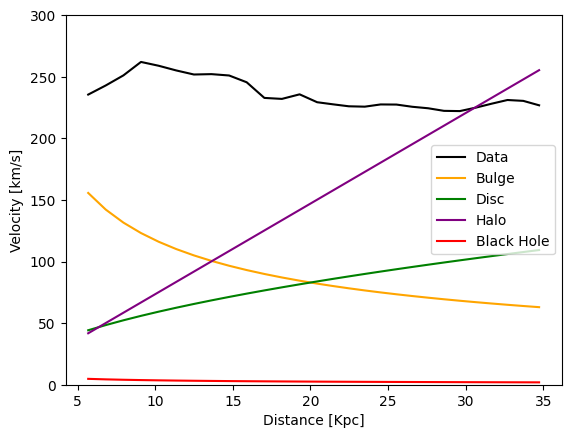

In [61]:
# plotting the final graph to include actual data and black hole data
dis = tab["col2"]
vel = tab["col3"]
plt.plot(dis, vel, color="black", label="Data") # plotting actual data
plt.plot(dis, vel_bulge.value, color="orange", label="Bulge")
plt.plot(dis, vel_disc.value, color="green", label="Disc")
plt.plot(dis, vel_halo.value, color="purple", label="Halo")
plt.plot(dis, vel_bh.value, color="red", label="Black Hole")

# plotting black hole data
plt.xlabel("Distance [Kpc]") # label for the x axis
plt.ylabel("Velocity [km/s]") # label for the y axis
plt.ylim(0,300) # set the y axis limits
plt.legend() # add a legend to the plot